In [97]:
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [98]:
data = pd.read_csv('data/data_indexes_moex_log_returns.csv', index_col=0)

In [99]:
data.head()

,MOEXRE,MOEXMM,MOEXIT,MOEXFN,MOEXEU,MOEXCN,MOEXCH,MOEXOG,MOEXTL,MOEXTN
TRADEDATE,,,,,,,,,,
2004-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-11,NaN,NaN,NaN,NaN,NaN,0.000240,NaN,NaN,NaN,NaN
2005-01-12,NaN,-0.013441,NaN,-0.009810,-0.009228,-0.002904,NaN,0.002142,-0.011152,NaN
2005-01-13,NaN,-0.005678,NaN,-0.002032,-0.001432,0.004222,NaN,-0.000822,-0.002205,NaN


In [100]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data.index = pd.to_datetime(data.index)


In [101]:
# На выходе мы получим статистику теста Дики-Фуллера и p-значение. Если p-значение меньше уровня значимости (обычно 0.05), 
# то мы можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным.
p_values = []

for col in data.columns:
    ts = data[col].interpolate(method='time').dropna()

    result = adfuller(ts)

    p_values.append(round(result[1], 5))

p = pd.Series(p_values, index = data.columns, name='p-values')
p

MOEXRE    0.00000
MOEXMM    0.00000
MOEXIT    0.00029
MOEXFN    0.00000
MOEXEU    0.00000
MOEXCN    0.00000
MOEXCH    0.00000
MOEXOG    0.00000
MOEXTL    0.00000
MOEXTN    0.00000
Name: p-values, dtype: float64

In [102]:
ADF_Statistic = []

for col in data.columns:
    ts = data[col].interpolate(method='time').dropna()

    result = adfuller(ts)

    ADF_Statistic.append(round(result[0], 5))

p = pd.Series(ADF_Statistic, index = data.columns, name='ADF_Statistic')
p

MOEXRE    -9.95588
MOEXMM   -10.76917
MOEXIT    -4.40589
MOEXFN   -10.42624
MOEXEU   -11.78531
MOEXCN   -11.42489
MOEXCH    -9.25113
MOEXOG   -11.07019
MOEXTL   -10.55580
MOEXTN   -21.35166
Name: ADF_Statistic, dtype: float64

In [103]:
from statsmodels.graphics import tsaplots


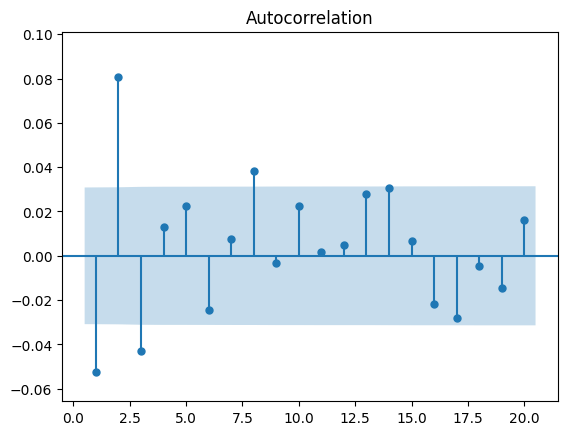

In [104]:
fig = tsaplots.plot_acf(x = ts, lags=20, zero=False, auto_ylims=True)
plt.show() 

In [105]:
# for i in range(len(ts)):
#     ts[i] = data[i].interpolate(method='time')

# # Построение графика автокорреляции для каждого временного ряда
# for i in range(len(ts)):
#     fig = tsaplots.plot_acf(x=ts[i], lags=20, zero=False, auto_ylims=True)
#     plt.show()

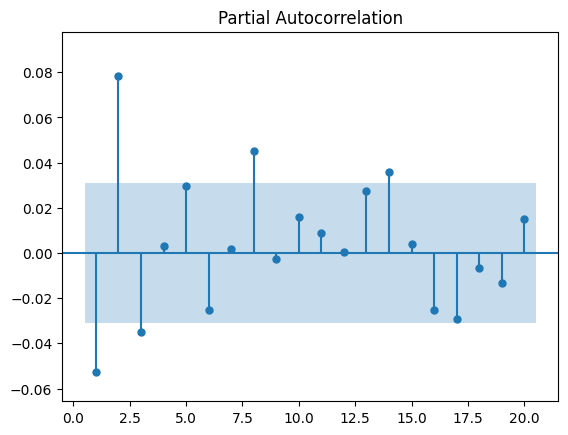

In [106]:
fig = tsaplots.plot_pacf(x = ts, lags=20, zero=False, auto_ylims=True)
plt.show() 

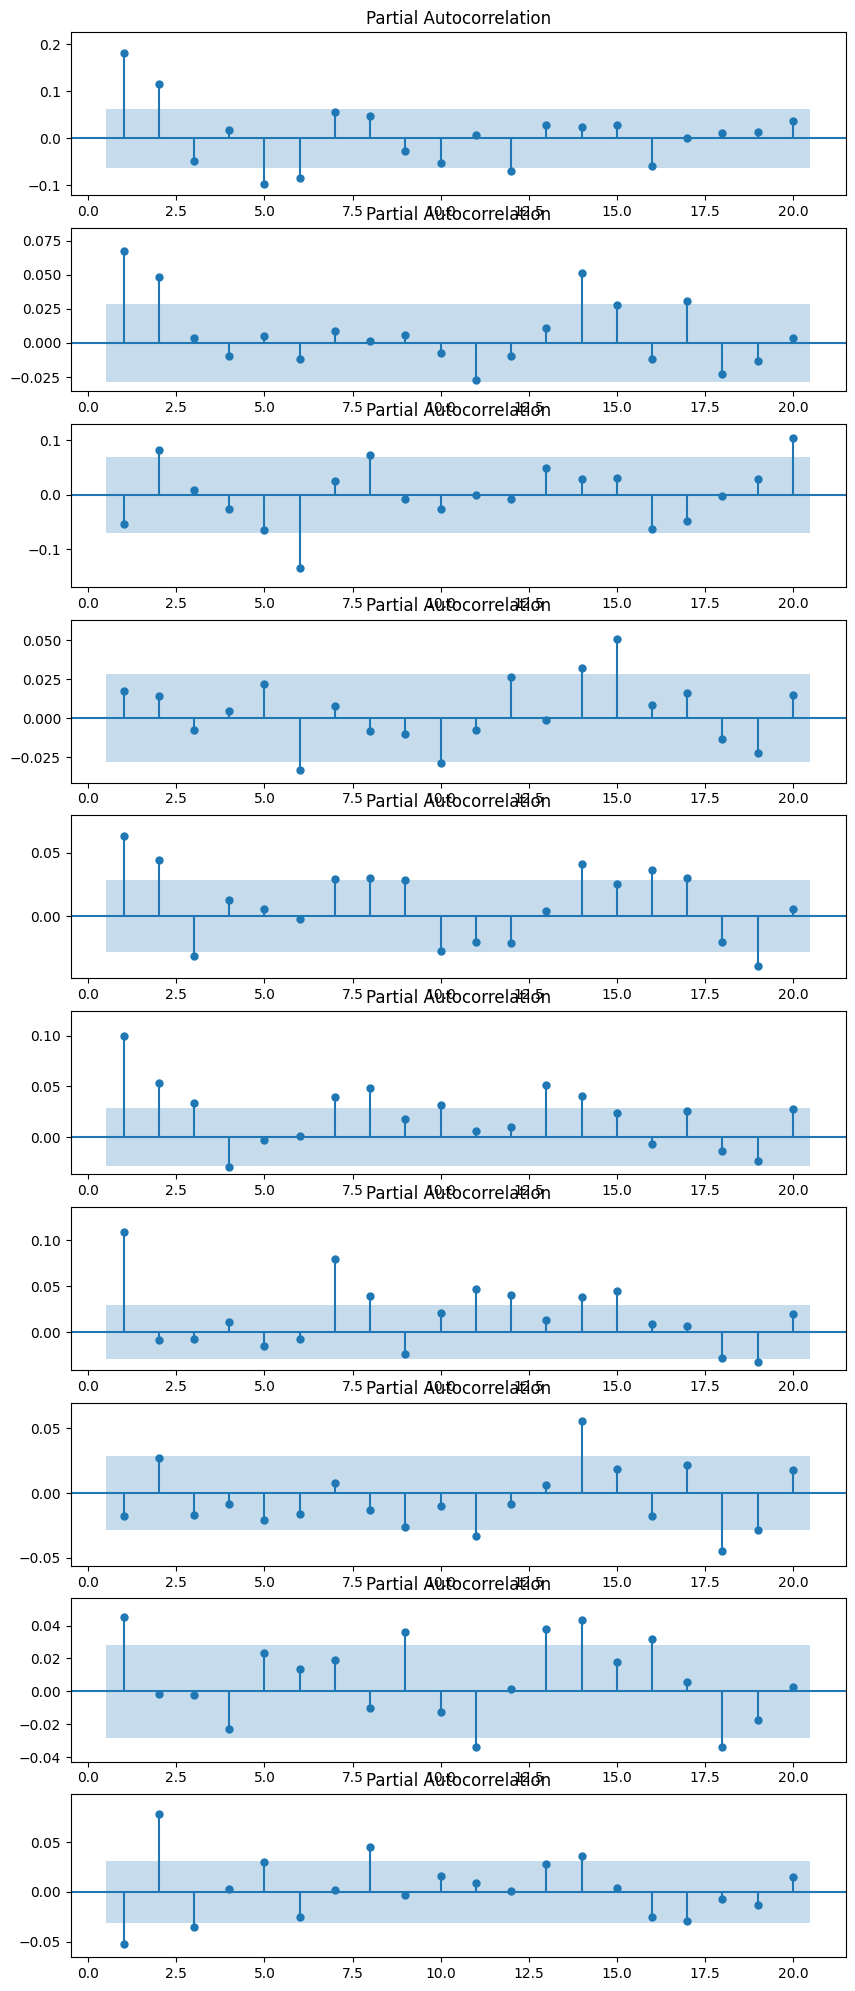

In [112]:
fig, axes = plt.subplots(data.shape[1], figsize = (10, 25))

for ax, col in zip(axes, data.columns):
     tsaplots.plot_pacf(x = data[col].interpolate(method='time').dropna(), lags=20, zero=False, auto_ylims=True, ax=ax)